# **CAPSTONE PROJECT: BATTLE OF THE NEIGHBORHOODS** 

### **I. Purpose**

This document provides the details of my final peer reviewed assignment for the IBM Data Science Professional Certificate program – Coursera Capstone.

## **II. Introduction**

Glasgow is the most populous city in Scotland, and the third most populous city in the United Kingdom, as of the 2017 estimated city population of 621,020. Historically part of Lanarkshire, the city now forms the Glasgow City council area, one of the 32 council areas of Scotland;Glasgow is situated on the River Clyde in the country's West Central Lowlands. It is the fifth most visited city in the UK.

Glasgow has an estimated population of 596,000, which is little changed from 595,000 in 2012 and 593,000 in 2011. Glasgow has a population density of 3,400 people per square kilometer, which makes it the most densely populated city in Scotland. The larger Greater Glasgow area has an estimated population of 1.2 million, while the region surrounding the conurbation has about 2.8 million residents. This represents about 42% of the population of Scotland. Additionally, the city proper takes 175 square kilometers of area (approximately 68 square miles), while the metro area expands out to 3,338 square kilometers (about 1,289 square miles).

Coffee is the most popular drink worldwide with around two billion cups consumed every day. In the UK, we now drink approximately 95 million cups of coffee per day. The coffee industry creates over 210,000 UK jobs. The Gross Value-Added contribution from the UK coffee industry to the economy is estimated to be £9.1 billion, whilst output contribution, including indirect and induced multiplier impacts, of £17.7 billion in 2017.

In this project, we will atempt to use FourSquare and K-Means clustering to find the optimal location for opening a new cafe. 

## **III. Data acquisition**

This demonstration will make use of the following data sources:

Greater Glasgow & Clyde areas and their size and population density:
https://en.wikipedia.org/wiki/List_of_places_in_Glasgow


A list of current venues in Glasgow will be obtained using FourSquareAPI. We will then analyse these venues, segment them and find only the coffee shops and the most frequented coffee shops in each district.

Glasgow Top Venue Recommendations from FourSquare API
(FourSquare website: www.foursquare.com)


## **IV. Methodology**

In [1]:
# Install all necessary packages 

import requests
from bs4 import BeautifulSoup #parses through xml and html 
import csv
import json
import xml
import pandas as pd
import numpy as np

#visualising maps and data interpreted by Python
!conda install -c conda-forge folium=0.5.0 --yes 
import folium
from folium import plugins

import json
from pprint import pprint

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim #converts address into latitude and longitude coordinates

#libraries for displaying images 
from IPython.display import Image
from IPython.core.display import HTML

#plotting
import matplotlib.cm as cm
import matplotlib.colors as colors 

#clustering
from sklearn.cluster import KMeans

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json
import requests #handles requests 
from pandas.io.json import json_normalize #transform json files into pandas dataframe

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
#URL containing list of Glasgow subway stations
url = requests.get('https://en.wikipedia.org/wiki/List_of_places_in_Glasgow').text

In [3]:
soup = BeautifulSoup(url, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of places in Glasgow - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"Xp1i7ApAAEUAAA29MKMAAAAU","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_places_in_Glasgow","wgTitle":"List of places in Glasgow","wgCurRevisionId":932466011,"wgRevisionId":932466011,"wgArticleId":1173652,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from May 2015","Use British English from May 2015","Areas of Glasgow","Glasgow-related lists","Glasgow","Lists of

In [4]:
arrond_table = soup.find('table', class_='wikitable sortable')
arrond_table_rows = arrond_table.find_all('tr')

In [5]:
#extract information from table 
information = []
for row in arrond_table_rows:
    info = row.text.split('\n')[1:-1]
    information.append(info)
    


information

[['',
  '',
  'District',
  '',
  'Population',
  '',
  'Area (km²)',
  '',
  'Density (/km²)'],
 ['1', '', 'Govanhill', '', '9,725', '', '0.86', '', '11,308'],
 ['2', '', 'Pollokshields', '', '9,738', '', '1.59', '', '6,125'],
 ['3', '', 'Partick', '', '8,884', '', '0.85', '', '10,452'],
 ['4', '', 'Hillhead', '', '6,275', '', '0.96', '', '6,536'],
 ['5', '', 'Govan', '', '5,860', '', '1.63', '', '3,595'],
 ['6', '', 'Gorbals', '', '6,030', '', '0.83', '', '7,265'],
 ['7', '', 'Shawlands', '', '7,015', '', '0.52', '', '13,490'],
 ['8', '', 'Langside', '', '4,425', '', '0.46', '', '9,620'],
 ['Σ', '', 'Total', '', '57,952', '', '7.7', '', '7,526']]

In [6]:
#turn the information into a dataframe 
arrond_df = pd.DataFrame(information[1:], columns=information[0])


arrond_df.head(25)


,,,District,,Population,,Area (km²),,Density (/km²)
0,1,,Govanhill,,"9,725",,0.86,,"11,308"
1,2,,Pollokshields,,"9,738",,1.59,,"6,125"
2,3,,Partick,,"8,884",,0.85,,"10,452"
3,4,,Hillhead,,"6,275",,0.96,,"6,536"
4,5,,Govan,,"5,860",,1.63,,"3,595"
5,6,,Gorbals,,"6,030",,0.83,,"7,265"
6,7,,Shawlands,,"7,015",,0.52,,"13,490"
7,8,,Langside,,"4,425",,0.46,,"9,620"
8,Σ,,Total,,"57,952",,7.7,,"7,526"


In [7]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
arrond_df['District_Coord']= arrond_df['District'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))

arrond_df

C:\Users\Croni\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


,,,District,,Population,,Area (km²),,Density (/km²),District_Coord
0,1,,Govanhill,,"9,725",,0.86,,"11,308","(55.8363741, -4.2581531)"
1,2,,Pollokshields,,"9,738",,1.59,,"6,125","(55.8422663, -4.2849973)"
2,3,,Partick,,"8,884",,0.85,,"10,452","(55.8699211, -4.3094365)"
3,4,,Hillhead,,"6,275",,0.96,,"6,536","(55.8752091, -4.293281)"
4,5,,Govan,,"5,860",,1.63,,"3,595","(55.860879, -4.3185273)"
5,6,,Gorbals,,"6,030",,0.83,,"7,265","(55.851813, -4.2531625)"
6,7,,Shawlands,,"7,015",,0.52,,"13,490","(55.8292301, -4.2924584)"
7,8,,Langside,,"4,425",,0.46,,"9,620","(55.8209413, -4.276069)"
8,Σ,,Total,,"57,952",,7.7,,"7,526","(45.420063, 12.3751361)"


In [8]:
arrond_new_df = arrond_df.drop(arrond_df.columns[0],axis=1)
arrond_df.update(arrond_new_df)
arrond_new_df

,District,Population,Area (km²),Density (/km²),District_Coord
0,Govanhill,"9,725",0.86,"11,308","(55.8363741, -4.2581531)"
1,Pollokshields,"9,738",1.59,"6,125","(55.8422663, -4.2849973)"
2,Partick,"8,884",0.85,"10,452","(55.8699211, -4.3094365)"
3,Hillhead,"6,275",0.96,"6,536","(55.8752091, -4.293281)"
4,Govan,"5,860",1.63,"3,595","(55.860879, -4.3185273)"
5,Gorbals,"6,030",0.83,"7,265","(55.851813, -4.2531625)"
6,Shawlands,"7,015",0.52,"13,490","(55.8292301, -4.2924584)"
7,Langside,"4,425",0.46,"9,620","(55.8209413, -4.276069)"
8,Total,"57,952",7.7,"7,526","(45.420063, 12.3751361)"


In [9]:
arrond_new_df = arrond_new_df.drop(arrond_new_df.columns[4],axis=1)
arrond_new_df.update(arrond_new_df)
arrond_new_df

,District,Population,Area (km²),Density (/km²)
0,Govanhill,"9,725",0.86,"11,308"
1,Pollokshields,"9,738",1.59,"6,125"
2,Partick,"8,884",0.85,"10,452"
3,Hillhead,"6,275",0.96,"6,536"
4,Govan,"5,860",1.63,"3,595"
5,Gorbals,"6,030",0.83,"7,265"
6,Shawlands,"7,015",0.52,"13,490"
7,Langside,"4,425",0.46,"9,620"
8,Total,"57,952",7.7,"7,526"


In [10]:
arrond_new_df.dtypes

District          object
Population        object
Area (km²)        object
Density (/km²)    object
dtype: object

In [11]:
arrond_new_df = arrond_df.drop(arrond_df.columns[1],axis=1)
arrond_df.update(arrond_new_df)

In [12]:
arrond_new_df.head(25)

,District,Population,Area (km²),Density (/km²),District_Coord
0,Govanhill,"9,725",0.86,"11,308","(55.8363741, -4.2581531)"
1,Pollokshields,"9,738",1.59,"6,125","(55.8422663, -4.2849973)"
2,Partick,"8,884",0.85,"10,452","(55.8699211, -4.3094365)"
3,Hillhead,"6,275",0.96,"6,536","(55.8752091, -4.293281)"
4,Govan,"5,860",1.63,"3,595","(55.860879, -4.3185273)"
5,Gorbals,"6,030",0.83,"7,265","(55.851813, -4.2531625)"
6,Shawlands,"7,015",0.52,"13,490","(55.8292301, -4.2924584)"
7,Langside,"4,425",0.46,"9,620","(55.8209413, -4.276069)"
8,Total,"57,952",7.7,"7,526","(45.420063, 12.3751361)"


In [13]:
arrond_new_df = arrond_new_df.drop([8])
arrond_new_df.head(25)

,District,Population,Area (km²),Density (/km²),District_Coord
0,Govanhill,"9,725",0.86,"11,308","(55.8363741, -4.2581531)"
1,Pollokshields,"9,738",1.59,"6,125","(55.8422663, -4.2849973)"
2,Partick,"8,884",0.85,"10,452","(55.8699211, -4.3094365)"
3,Hillhead,"6,275",0.96,"6,536","(55.8752091, -4.293281)"
4,Govan,"5,860",1.63,"3,595","(55.860879, -4.3185273)"
5,Gorbals,"6,030",0.83,"7,265","(55.851813, -4.2531625)"
6,Shawlands,"7,015",0.52,"13,490","(55.8292301, -4.2924584)"
7,Langside,"4,425",0.46,"9,620","(55.8209413, -4.276069)"


In [14]:
arrond_new_df[['Latitude', 'Longitude']] = arrond_new_df['District_Coord'].apply(pd.Series)
arrond_new_df

,District,Population,Area (km²),Density (/km²),District_Coord,Latitude,Longitude
0,Govanhill,"9,725",0.86,"11,308","(55.8363741, -4.2581531)",55.836374,-4.258153
1,Pollokshields,"9,738",1.59,"6,125","(55.8422663, -4.2849973)",55.842266,-4.284997
2,Partick,"8,884",0.85,"10,452","(55.8699211, -4.3094365)",55.869921,-4.309437
3,Hillhead,"6,275",0.96,"6,536","(55.8752091, -4.293281)",55.875209,-4.293281
4,Govan,"5,860",1.63,"3,595","(55.860879, -4.3185273)",55.860879,-4.318527
5,Gorbals,"6,030",0.83,"7,265","(55.851813, -4.2531625)",55.851813,-4.253163
6,Shawlands,"7,015",0.52,"13,490","(55.8292301, -4.2924584)",55.829230,-4.292458
7,Langside,"4,425",0.46,"9,620","(55.8209413, -4.276069)",55.820941,-4.276069


In [15]:
Area_list = ['Govanhill', 'Pollokshields', 'Partick', 'Hillhead', 'Govan', 'Gorbals', 'Shawlands', 'Langslide']
df_selected = arrond_new_df.loc[arrond_new_df['District'].isin(Area_list)]
df_selected

,District,Population,Area (km²),Density (/km²),District_Coord,Latitude,Longitude
0,Govanhill,"9,725",0.86,"11,308","(55.8363741, -4.2581531)",55.836374,-4.258153
1,Pollokshields,"9,738",1.59,"6,125","(55.8422663, -4.2849973)",55.842266,-4.284997
2,Partick,"8,884",0.85,"10,452","(55.8699211, -4.3094365)",55.869921,-4.309437
3,Hillhead,"6,275",0.96,"6,536","(55.8752091, -4.293281)",55.875209,-4.293281
4,Govan,"5,860",1.63,"3,595","(55.860879, -4.3185273)",55.860879,-4.318527
5,Gorbals,"6,030",0.83,"7,265","(55.851813, -4.2531625)",55.851813,-4.253163
6,Shawlands,"7,015",0.52,"13,490","(55.8292301, -4.2924584)",55.829230,-4.292458


**End of week 4 - part 1**

So far we've gathered data concerning the regions of Glasgow, their area, population density and location. Since we want to open a coffee shop, we'll have to examine the regions with most traffic (especially morning traffic) and the best buisness areas.

Next, we will use FourSquare API to gather information on the coffee places that already exist and see good traffic and use that to establish a good location for opening our buisness.


In [16]:
#Prepare Foursquare API

CLIENT_ID = 'PKNPIENUPD0BHCBOSTRQSWNCBOJRHOVBJSGMWS1GZ41SXYDV'
CLIENT_SECRET = 'X0NOBWPA2KGZ0LBQ5NZSCFXAAWB4HXIQEE53HYGQBICSEWZL' 
VERSION = '20190325'

print('My credentails:')
print('My CLIENT_ID: ' + CLIENT_ID)
print('My CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
My CLIENT_ID: PKNPIENUPD0BHCBOSTRQSWNCBOJRHOVBJSGMWS1GZ41SXYDV
My CLIENT_SECRET:X0NOBWPA2KGZ0LBQ5NZSCFXAAWB4HXIQEE53HYGQBICSEWZL


In [17]:
radius = 1000
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Dist_Latitude', 
                  'Dist_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

In [18]:
Glasgow_cafes_df = getNearbyVenues(names=arrond_new_df['District'],
                                   latitudes=arrond_new_df['Latitude'],
                                   longitudes=arrond_new_df['Longitude']
                                  )

Govanhill
Pollokshields
Partick
Hillhead
Govan
Gorbals
Shawlands
Langside


In [19]:
print ("Shape of the Venues Dataframe: ", Glasgow_cafes_df.shape)
Glasgow_cafes_df.tail(3)

Shape of the Venues Dataframe:  (357, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
354,Langside,55.820941,-4.276069,Glasshouse,55.828656,-4.270534,Garden
355,Langside,55.820941,-4.276069,Shawlands Arcade,55.829495,-4.279746,Shopping Mall
356,Langside,55.820941,-4.276069,Barry's,55.817391,-4.262121,Convenience Store


In [20]:
#Create a dataframe that only contains cafes

Glasgow_cafes_only = Glasgow_cafes_df[Glasgow_cafes_df['Venue_Category']\
                                                          .str.contains('Coffee')].reset_index(drop=True)
Glasgow_cafes_only.index = np.arange(1, len(Glasgow_cafes_only)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Glasgow_cafes_only.shape)
Glasgow_cafes_only.head(3)

Shape of the Data-Frame with Venue Category only Restaurant:  (16, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
1,Govanhill,55.836374,-4.258153,Tapa Coffeehouse,55.836022,-4.271010,Coffee Shop
2,Partick,55.869921,-4.309437,Meadow Road Coffee,55.870687,-4.316777,Coffee Shop
3,Partick,55.869921,-4.309437,Caffè Nero,55.872562,-4.312397,Coffee Shop


In [21]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'Glasgow'

geolocator = Nominatim(user_agent="Glasgow_explorer")
location = geolocator.geocode(address)
Glasgow_latitude = location.latitude
Glasgow_longitude = location.longitude
print('The geograpical coordinates of Glasgow are {}, {}.'.format(Glasgow_latitude, Glasgow_longitude))

The geograpical coordinates of Glasgow are 55.8609825, -4.2488787.


In [23]:
#Put the top rated coffee shops in the map of Glasgow

map_cafes = folium.Map(location=[Glasgow_latitude, Glasgow_longitude], zoom_start=11, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Districts
Districts = ['Govanhill', 'Pollokshields', 'Partick', 'Hillhead', 'Gorbals', 'Shawlands', 'Langside']

x = np.arange(len(Districts))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000', '#ff5733', '#33fd5']

# add markers to the map
# markers_colors = []
for lat, lon, poi, distr in zip(Glasgow_cafes_only['Venue_Lat'], 
                                  Glasgow_cafes_only['Venue_Long'], 
                                  Glasgow_cafes_only['Venue_Category'], 
                                  Glasgow_cafes_only['District']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.3).add_to(map_cafes)
    
map_cafes

In [24]:
#Count the number of venue categories

print (Glasgow_cafes_df['Venue_Category'].value_counts())

Café                             41
Pub                              23
Bar                              21
Coffee Shop                      16
Italian Restaurant               14
Restaurant                       13
Grocery Store                    13
Sandwich Place                   11
Indian Restaurant                10
Supermarket                       8
Park                              8
Deli / Bodega                     6
Seafood Restaurant                6
Bakery                            6
Pizza Place                       6
Discount Store                    6
Museum                            6
Hotel                             5
Chinese Restaurant                4
Steakhouse                        4
Gastropub                         4
Shopping Mall                     4
Beer Bar                          4
Asian Restaurant                  4
Gym                               4
Metro Station                     3
Train Station                     3
Art Gallery                 

In [25]:
# create a dataframe of top 10 categories
Glasgow_cafes_Top10 = Glasgow_cafes_df['Venue_Category'].value_counts()[0:10].to_frame(name='frequency')
Glasgow_cafes_Top10 = Glasgow_cafes_Top10.reset_index()

Glasgow_cafes_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Glasgow_cafes_Top10

,Venue_Category,Frequency
0,Café,41
1,Pub,23
2,Bar,21
3,Coffee Shop,16
4,Italian Restaurant,14
5,Restaurant,13
6,Grocery Store,13
7,Sandwich Place,11
8,Indian Restaurant,10
9,Supermarket,8


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data = Glasgow_cafes_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in Glasgow', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

<Figure size 1800x700 with 1 Axes>

### From the chart above you can notice that cafes are the most popular venue types in Glasgow

In [27]:
### Use One Hot Encoding to Get More Information about the Venue Categories 
Glasgow_onehot = pd.get_dummies(Glasgow_cafes_df[['Venue_Category']], prefix="", prefix_sep="")

Glasgow_onehot['District'] = Glasgow_cafes_df['District'] 

### move district column to the first column
fixed_columns = [Glasgow_onehot.columns[-1]] + list(Glasgow_onehot.columns[:-1])
Glasgow_onehot = Glasgow_onehot[fixed_columns]
Glasgow_onehot.head(3)

,District,Afghan Restaurant,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,Bar,Beer Bar,Beer Store,Bistro,Bookstore,Botanical Garden,Breakfast Spot,Burger Joint,Bus Station,Bus Stop,Café,Chinese Restaurant,Climbing Gym,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega,Diner,Discount Store,Donut Shop,Event Space,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food & Drink Shop,French Restaurant,Garden,Gas Station,Gastropub,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Movie Theater,Museum,Music Store,Music Venue,Nightclub,North Indian Restaurant,Outdoor Supply Store,Paella Restaurant,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Plaza,Portuguese Restaurant,Pub,Record Shop,Restaurant,Roller Rink,Russian Restaurant,Sandwich Place,Scottish Restaurant,Seafood Restaurant,Shopping Mall,Shopping Plaza,Smoke Shop,Soccer Field,Steakhouse,Student Center,Supermarket,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Whisky Bar
0,Govanhill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Govanhill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Govanhill,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
Grouped_df = Glasgow_onehot.groupby('District').mean().reset_index()
Grouped_df.index = np.arange(350, len(Glasgow_onehot)+1)
Grouped_df


,District,Afghan Restaurant,American Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,Bar,Beer Bar,Beer Store,Bistro,Bookstore,Botanical Garden,Breakfast Spot,Burger Joint,Bus Station,Bus Stop,Café,Chinese Restaurant,Climbing Gym,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega,Diner,Discount Store,Donut Shop,Event Space,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food & Drink Shop,French Restaurant,Garden,Gas Station,Gastropub,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,History Museum,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Movie Theater,Museum,Music Store,Music Venue,Nightclub,North Indian Restaurant,Outdoor Supply Store,Paella Restaurant,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Plaza,Portuguese Restaurant,Pub,Record Shop,Restaurant,Roller Rink,Russian Restaurant,Sandwich Place,Scottish Restaurant,Seafood Restaurant,Shopping Mall,Shopping Plaza,Smoke Shop,Soccer Field,Steakhouse,Student Center,Supermarket,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Whisky Bar
350,Gorbals,0.013514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054054,0.013514,0.00,0.000000,0.013514,0.00,0.013514,0.00,0.000000,0.000000,0.040541,0.000000,0.000000,0.013514,0.067568,0.00,0.013514,0.000000,0.013514,0.000000,0.000000,0.000000,0.00,0.013514,0.000000,0.000000,0.000000,0.000000,0.000000,0.013514,0.000000,0.000000,0.00,0.013514,0.013514,0.013514,0.013514,0.013514,0.040541,0.000000,0.00,0.013514,0.00,0.000000,0.00,0.040541,0.00,0.027027,0.013514,0.000000,0.013514,0.000000,0.013514,0.027027,0.027027,0.000000,0.000000,0.013514,0.013514,0.013514,0.000000,0.000000,0.013514,0.000000,0.027027,0.00,0.067568,0.013514,0.040541,0.000000,0.013514,0.013514,0.013514,0.054054,0.027027,0.000000,0.00,0.013514,0.040541,0.00,0.000000,0.000000,0.013514,0.013514,0.027027,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000
351,Govan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.066667,0.000000,0.133333,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,0.000000,0.00,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.066667,0.000000,0.000000,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000
352,Govanhill,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.035714,0.142857,0.035714,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.035714,0.000000,0.000000,0.035714,0.035714,0.00,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.00,0.035714,0.071429,0.035714,0.000000,0.000000,0.035714,0.000000,0.00,0.107143,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.035714,0.000000,0.035714,0.000000,0.000000,0.035714,0.000000,0.00,0.035714,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.035714,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.035714,0.000000,0.00,0.000000,0.000000
353,Hillhead,0.000000,0.000000,0.020000,0.020000,0.000000,0.000

In [31]:
num_top_venues = 5

for places in Grouped_df['District']:
    print(places)
    temp = Grouped_df[Grouped_df['District'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

Gorbals
                Venue  Freq
0                 Pub  0.07
1         Coffee Shop  0.07
2  Seafood Restaurant  0.05
3                 Bar  0.05
4  Italian Restaurant  0.04


Govan
            Venue  Freq
0            Café  0.13
1     Gas Station  0.13
2          Museum  0.13
3  Discount Store  0.13
4             Gym  0.07


Govanhill
               Venue  Freq
0                Bar  0.14
1  Indian Restaurant  0.11
2                Gym  0.07
3              Diner  0.04
4               Park  0.04


Hillhead
               Venue  Freq
0               Café  0.13
1                Bar  0.08
2                Pub  0.07
3        Coffee Shop  0.05
4  Indian Restaurant  0.05


Langside
                Venue  Freq
0  Italian Restaurant  0.12
1                Café  0.12
2       Grocery Store  0.12
3         Pizza Place  0.08
4                 Pub  0.08


Partick
           Venue  Freq
0           Café  0.15
1            Pub  0.07
2    Coffee Shop  0.05
3            Bar  0.05
4  Deli / Bodega  0.0

In [32]:
## Define a Function to select the top 10 venues

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10
indicators = ['st', 'nd', 'rd']
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Venues_sorted = pd.DataFrame(columns=columns)
Venues_sorted['District'] = Grouped_df['District']

for ind in np.arange(Grouped_df.shape[0]):
    Venues_sorted.iloc[ind, 1:] = return_most_common_venues(Grouped_df.iloc[ind, :], num_top_venues)

    
Venues_sorted.index = np.arange(1, len(Venues_sorted)+1)
Venues_sorted.head(8)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Gorbals,Pub,Coffee Shop,Bar,Seafood Restaurant,Hotel,Café,Restaurant,Italian Restaurant,Steakhouse,Nightclub
2,Govan,Museum,Café,Discount Store,Gas Station,Sandwich Place,Gym,Grocery Store,Park,Bus Station,Bar
3,Govanhill,Bar,Indian Restaurant,Gym,Sandwich Place,Gym / Fitness Center,Grocery Store,Food & Drink Shop,Diner,North Indian Restaurant,Park
4,Hillhead,Café,Bar,Pub,Coffee Shop,Indian Restaurant,Restaurant,Italian Restaurant,Gastropub,Deli / Bodega,Art Gallery
5,Langside,Italian Restaurant,Grocery Store,Café,Pizza Place,Restaurant,Pub,Convenience Store,Shopping Mall,Discount Store,Food & Drink Shop
6,Partick,Café,Pub,Deli / Bodega,Coffee Shop,Bar,Sandwich Place,Restaurant,Supermarket,Grocery Store,Italian Restaurant
7,Pollokshields,Café,Park,Hotel,Bakery,Roller Rink,Metro Station,Climbing Gym,Supermarket,Grocery Store,Indoor Play Area
8,Shawlands,Café,Pub,Grocery Store,Italian Restaurant,Supermarket,Gym / Fitness Center,Shopping Mall,Coffee Shop,Discount Store,Nightclub


[5, 0, 1, 5, 0, 4, 0, 1]


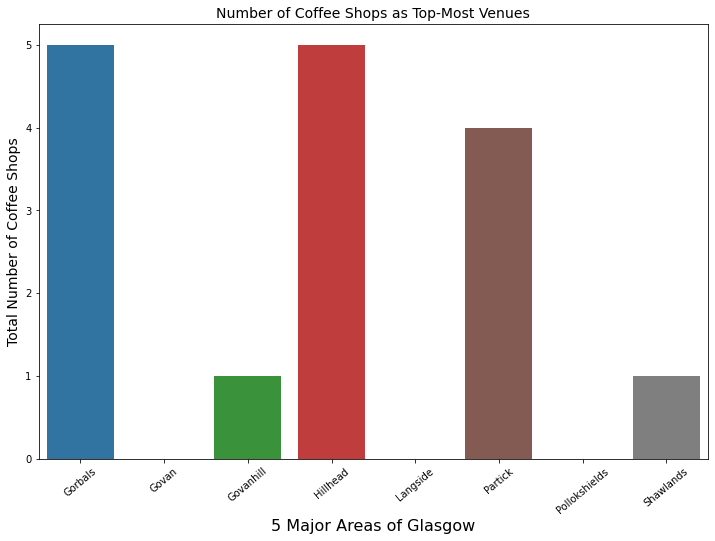

In [33]:
Tokyo_5_Dist_Venues_Coffee = Glasgow_cafes_df.groupby(['District'])['Venue_Category'].apply(lambda x: x[x.str.contains('Coffee','cafe')].count())
Tokyo_5_Dist_Venues_Coffee_df = Tokyo_5_Dist_Venues_Coffee.to_frame().reset_index()
Tokyo_5_Dist_Venues_Coffee_df.columns = ['District', 'Number of Coffee Shops']
Tokyo_5_Dist_Venues_Coffee_df.index = np.arange(1, len(Tokyo_5_Dist_Venues_Coffee_df)+1)

#print ("shape of the dataframe: ", Tokyo_5_Dist_Venues_restaurant_df.shape)
#print (Tokyo_5_Dist_Venues_restaurant_df.head(5))
#print (type(Tokyo_5_Dist_Venues_restaurant_df[['Number of Restaurant']]))
list_rest_no = Tokyo_5_Dist_Venues_Coffee_df['Number of Coffee Shops'].to_list()
print (list_rest_no)
fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='District', y='Number of Coffee Shops', data=Tokyo_5_Dist_Venues_Coffee_df)

bar.set_ylabel("Total Number of Coffee Shops", fontsize=14)
bar.set_xlabel("5 Major Areas of Glasgow", fontsize=16)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Coffee Shops as Top-Most Venues", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

## Clustering the major areas of Glasgow using K-Means 

In [34]:
# set number of clusters
kclusters = 3

grouped_clustering = Grouped_df.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
print ("Check the 5 Cluster labels :",  kmeans.labels_[0:5])

Check the 5 Cluster labels : [0 2 0 0 0]


In [35]:
# add clustering labels

Venues_sorted.insert(0, 'Cluster Laba', kmeans.labels_)
Coordinate_Cluster_merged = df_selected
#merge the inital city Dataframe with most visited places for each neighborhood
Coordinate_Cluster_merged = Coordinate_Cluster_merged.join \
                                        (Venues_sorted.set_index('District'), on='District')
Coordinate_Cluster_merged.head()

,District,Population,Area (km²),Density (/km²),District_Coord,Latitude,Longitude,Cluster Laba,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Govanhill,"9,725",0.86,"11,308","(55.8363741, -4.2581531)",55.836374,-4.258153,0,Bar,Indian Restaurant,Gym,Sandwich Place,Gym / Fitness Center,Grocery Store,Food & Drink Shop,Diner,North Indian Restaurant,Park
1,Pollokshields,"9,738",1.59,"6,125","(55.8422663, -4.2849973)",55.842266,-4.284997,1,Café,Park,Hotel,Bakery,Roller Rink,Metro Station,Climbing Gym,Supermarket,Grocery Store,Indoor Play Area
2,Partick,"8,884",0.85,"10,452","(55.8699211, -4.3094365)",55.869921,-4.309437,0,Café,Pub,Deli / Bodega,Coffee Shop,Bar,Sandwich Place,Restaurant,Supermarket,Grocery Store,Italian Restaurant
3,Hillhead,"6,275",0.96,"6,536","(55.8752091, -4.293281)",55.875209,-4.293281,0,Café,Bar,Pub,Coffee Shop,Indian Restaurant,Restaurant,Italian Restaurant,Gastropub,Deli / Bodega,Art Gallery
4,Govan,"5,860",1.63,"3,595","(55.860879, -4.3185273)",55.860879,-4.318527,2,Museum,Café,Discount Store,Gas Station,Sandwich Place,Gym,Grocery Store,Park,Bus Station,Bar


In [37]:
map_of_clusters = folium.Map(location=[Glasgow_latitude, Glasgow_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Coordinate_Cluster_merged['Latitude'], 
                                  Coordinate_Cluster_merged['Longitude'], 
                                  Coordinate_Cluster_merged['District'], 
                                  Coordinate_Cluster_merged['Cluster Laba']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_of_clusters)
       
map_of_clusters

In [39]:
# create map
map_of_top_restaurants = folium.Map(location=[Glasgow_latitude, Glasgow_longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
Area_list = ['Govanhill', 'Pollokshields', 'Partick', 'Hillhead', 'Govan', 'Gorbals', 'Shawlands', 'Langslide']

# add markers to the map
for lat, lon, poi, cluster in zip(Coordinate_Cluster_merged['Latitude'], 
                                  Coordinate_Cluster_merged['Longitude'], 
                                  Coordinate_Cluster_merged['District'], 
                                  Coordinate_Cluster_merged['Cluster Laba']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[Area_list.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_of_top_restaurants)
       
map_of_top_restaurants


## Analysis of the three clusters

In [41]:
Cluster1 = Coordinate_Cluster_merged.loc[Coordinate_Cluster_merged['Cluster Laba'] == 0, 
                                    Coordinate_Cluster_merged.columns[[3] + list(range(4, Coordinate_Cluster_merged.shape[1]))]]
print ("N-Cluster Label 0: %d" %(Cluster1.shape[0]))
Cluster1

N-Cluster Label 0: 5


,Density (/km²),District_Coord,Latitude,Longitude,Cluster Laba,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"11,308","(55.8363741, -4.2581531)",55.836374,-4.258153,0,Bar,Indian Restaurant,Gym,Sandwich Place,Gym / Fitness Center,Grocery Store,Food & Drink Shop,Diner,North Indian Restaurant,Park
2,"10,452","(55.8699211, -4.3094365)",55.869921,-4.309437,0,Café,Pub,Deli / Bodega,Coffee Shop,Bar,Sandwich Place,Restaurant,Supermarket,Grocery Store,Italian Restaurant
3,"6,536","(55.8752091, -4.293281)",55.875209,-4.293281,0,Café,Bar,Pub,Coffee Shop,Indian Restaurant,Restaurant,Italian Restaurant,Gastropub,Deli / Bodega,Art Gallery
5,"7,265","(55.851813, -4.2531625)",55.851813,-4.253163,0,Pub,Coffee Shop,Bar,Seafood Restaurant,Hotel,Café,Restaurant,Italian Restaurant,Steakhouse,Nightclub
6,"13,490","(55.8292301, -4.2924584)",55.829230,-4.292458,0,Café,Pub,Grocery Store,Italian Restaurant,Supermarket,Gym / Fitness Center,Shopping Mall,Coffee Shop,Discount Store,Nightclub


In [42]:
Cluster2 = Coordinate_Cluster_merged.loc[Coordinate_Cluster_merged['Cluster Laba'] == 1, 
                                    Coordinate_Cluster_merged.columns[[3] + list(range(4, Coordinate_Cluster_merged.shape[1]))]]
print ("N-Cluster Label 1: %d" %(Cluster2.shape[0]))
Cluster2

N-Cluster Label 1: 1


,Density (/km²),District_Coord,Latitude,Longitude,Cluster Laba,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"6,125","(55.8422663, -4.2849973)",55.842266,-4.284997,1,Café,Park,Hotel,Bakery,Roller Rink,Metro Station,Climbing Gym,Supermarket,Grocery Store,Indoor Play Area


In [43]:
Cluster3 = Coordinate_Cluster_merged.loc[Coordinate_Cluster_merged['Cluster Laba'] == 2, 
                                    Coordinate_Cluster_merged.columns[[3] + list(range(4, Coordinate_Cluster_merged.shape[1]))]]
print ("N-Cluster Label 2: %d" %(Cluster2.shape[0]))
Cluster3

N-Cluster Label 2: 1


,Density (/km²),District_Coord,Latitude,Longitude,Cluster Laba,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"3,595","(55.860879, -4.3185273)",55.860879,-4.318527,2,Museum,Café,Discount Store,Gas Station,Sandwich Place,Gym,Grocery Store,Park,Bus Station,Bar
